<a href="https://colab.research.google.com/github/Akshayrajnadar/Accelerometer/blob/master/Accelerometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prredicting Accelerometer Configuration
The dataset was generated by conducting experiments using a cooler fan equipped with weights on its blades to produce vibrations. To capture the vibration data, an accelerometer was attached to the fan cooler. The collected vibration data was then utilized to predict the time until motor failure by employing an artificial neural network (ANN).

To create distinct vibration scenarios, the weights were distributed in three different configurations: 'red,' 'blue,' and 'green.' In the 'red' configuration, two weight pieces were positioned on neighboring blades, representing the normal operating condition of the fan. The 'blue' configuration involved placing two weight pieces on blades at a 90-degree angle, resulting in a perpendicular arrangement. The 'green' configuration entailed positioning two weight pieces on opposite blades, creating a distinct vibration pattern.

By collecting vibration data from these three configurations, the researchers trained an artificial neural network to predict the remaining time until motor failure. The ANN was designed to analyze and learn from the patterns in the vibration data, allowing it to make accurate predictions regarding the health and longevity of the motor. By inputting vibration data into the trained neural network, it could determine the corresponding configuration—whether it belonged to the 'red,' 'blue,' or 'green' scenario.

The generated dataset, along with the developed artificial neural network model, offers valuable insights for motor failure prediction and preventive maintenance strategies. By understanding the unique vibration patterns associated with different weight distributions, it becomes possible to detect anomalies and potential issues within motor systems. This knowledge empowers industries to adopt proactive maintenance approaches, reducing the risk of unexpected motor failures, optimizing performance, and ensuring operational efficiency.

The combination of utilizing artificial neural networks and vibration data collected from the cooler fan with varying weight configurations holds immense potential for enhancing motor failure prediction and promoting reliable and robust motor-driven systems across various sectors.

Here we are going to make a RNN model will take the vibration data as input and predict the configuration associated with each data sample. The model can be trained using the labeled dataset, where each sample is labeled with the corresponding configuration (red, blue, or green). By learning from the patterns in the vibration data, the RNN model will be able to predict the configuration based on new, unseen data samples.

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Input
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
data  = pd.read_csv('/content/accelerometer.csv')
data.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [ ]:
data.shape

(153000, 5)

# Creating the input data from the whole dataset

In [ ]:
X = data.drop('wconfid', axis = 1)
print(X)

        pctid      x      y      z
0          20  1.004  0.090 -0.125
1          20  1.004 -0.043 -0.125
2          20  0.969  0.090 -0.121
3          20  0.973 -0.012 -0.137
4          20  1.000 -0.016 -0.121
...       ...    ...    ...    ...
152995    100  1.051  0.090 -0.262
152996    100  0.918  0.039 -0.129
152997    100  1.156 -0.094 -0.227
152998    100  0.934  0.203 -0.172
152999    100  1.199 -0.176  0.109

[153000 rows x 4 columns]


# Creating the output data from the whole dataset

In [ ]:
Y = data['wconfid']
Y = Y.map({1 : 0, 2 : 1, 3 : 2}).astype(float).astype(int)
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
152995    2
152996    2
152997    2
152998    2
152999    2
Name: wconfid, Length: 153000, dtype: int64


# Splitting the dataset into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
print(X_train)

        pctid      x      y      z
65221      40  1.020  0.105 -0.164
64821      40  1.016 -0.004 -0.152
80225      65  1.094  0.098  0.305
68029      45  0.949 -0.105 -0.145
65045      40  0.906  0.086 -0.137
...       ...    ...    ...    ...
19455      50  0.906  0.320 -0.164
151051    100  1.051  0.230 -0.027
43353      90  0.941  3.770 -1.781
116248     40  1.004 -0.102 -0.133
122637     50  0.934  0.047 -0.094

[107100 rows x 4 columns]


# Using np_utils.to_categorical to making the output data a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [ ]:
Y_train = np_utils.to_categorical(Y_train,num_classes=3)
print(Y_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
Y_test = np_utils.to_categorical(Y_test,num_classes=3)

In [ ]:
print(Y_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# mm = MinMaxScaler(feature_range = (0,1))
# X = mm.fit_transform(X_train)

In [ ]:
print(X_train)

        pctid      x      y      z
65221      40  1.020  0.105 -0.164
64821      40  1.016 -0.004 -0.152
80225      65  1.094  0.098  0.305
68029      45  0.949 -0.105 -0.145
65045      40  0.906  0.086 -0.137
...       ...    ...    ...    ...
19455      50  0.906  0.320 -0.164
151051    100  1.051  0.230 -0.027
43353      90  0.941  3.770 -1.781
116248     40  1.004 -0.102 -0.133
122637     50  0.934  0.047 -0.094

[107100 rows x 4 columns]


# Making the model

In [ ]:
model = models.Sequential()
model.add(Input( shape=[4,]))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(3, activation='sigmoid'))

# Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Training the model

In [ ]:
history = model.fit(X_train, Y_train, epochs=10,
          validation_data=(X_test, Y_test))

Epoch 1/10
3347/3347 [==============================] - 25s 5ms/step - loss: 0.9622 - accuracy: 0.4632 - val_loss: 0.8427 - val_accuracy: 0.5518
Epoch 2/10
3347/3347 [==============================] - 16s 5ms/step - loss: 0.7959 - accuracy: 0.5669 - val_loss: 0.7593 - val_accuracy: 0.5924
Epoch 3/10
3347/3347 [==============================] - 15s 5ms/step - loss: 0.7513 - accuracy: 0.5985 - val_loss: 0.7187 - val_accuracy: 0.6171
Epoch 4/10
3347/3347 [==============================] - 18s 5ms/step - loss: 0.7277 - accuracy: 0.6182 - val_loss: 0.6970 - val_accuracy: 0.6325
Epoch 5/10
3347/3347 [==============================] - 17s 5ms/step - loss: 0.7138 - accuracy: 0.6267 - val_loss: 0.7009 - val_accuracy: 0.6349
Epoch 6/10
3347/3347 [==============================] - 15s 5ms/step - loss: 0.7035 - accuracy: 0.6351 - val_loss: 0.7005 - val_accuracy: 0.6402
Epoch 7/10
3347/3347 [==============================] - 18s 5ms/step - loss: 0.6936 - accuracy: 0.6413 - val_loss: 0.7050 - val_ac

# Ploting the graph of Epochs vs accuracy

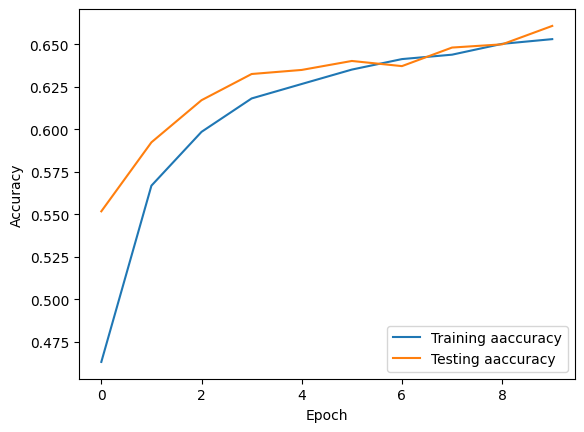

In [ ]:
plt.plot(history.history['accuracy'], label='Training aaccuracy')
plt.plot(history.history['val_accuracy'], label='Testing aaccuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plotting the graph of loss

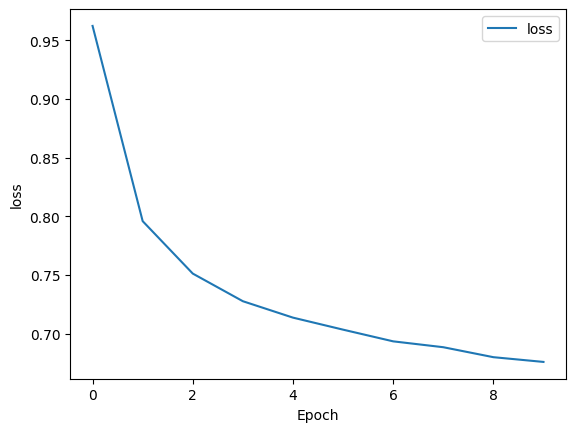

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')